In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("device_features.csv") #reading the file

In [4]:
df.head() #1st five rows

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,usb_connector,max_charging_power,bluetooth,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408
2,A135UZKAVZW,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,31-07-23 23:26,1080,2408
3,PAYB0000JP,Motorola,Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2...,16-06-23,01-05-23,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,30.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,Asia,23-07-23 19:14,720,1600
4,MC400,Motorola,Moto G53 5G 2022 Premium Edition TD-LTE LATAM ...,01-01-23,01-12-22,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,18.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,"North America,South America",23-07-23 15:52,720,1600


In [5]:
df.columns #checking out the different columns

Index(['oem_id', 'brand', 'model', 'released_date', 'announced_date',
       'hardware_designer', 'manufacturer', 'codename', 'general_extras',
       'device_category', 'width', 'height', 'depth', 'dimensions',
       'weight_gram', 'price', 'price_currency', 'platform',
       'operating_system', 'software_extras', 'cpu_clock', 'cpu', 'ram_type',
       'ram_capacity', 'non_volatile_memory_capacity', 'display_hole',
       'display_diagonal', 'horizontal_full_bezel_width',
       'display_area_utilization', 'pixel_density', 'display_type',
       'number_of_display_scales', 'display_refresh_rate',
       'graphical_controller', 'supported_cellular_bands', 'sim_card_slot',
       'usb', 'usb_services', 'usb_connector', 'max_charging_power',
       'bluetooth', 'WLAN', 'additional_sensors', 'battery_capacity',
       'market_regions', 'info_added_date', 'x_resolution', 'y_resolution'],
      dtype='object')

In [6]:
df['price_currency'].unique() #checking out unique currency to convert to usd

array(['USD', 'JPY', 'MXN', 'BRL', 'EUR', 'INR', 'GBP', 'CNY', 'TWD',
       'THB', 'CAD', 'SGD', 'IDR', 'AED', 'TRY', 'MYR', 'HKD', 'AUD',
       'KRW', 'CHF', 'ARS', 'KZT', 'HUF', 'PLN', 'RUB'], dtype=object)

In [7]:
exchange_rates = {
    'USD': 1.0,
    'JPY': 0.0073,   # Japanese Yen
    'MXN': 0.050,    # Mexican Peso
    'BRL': 0.19,     # Brazilian Real
    'EUR': 1.05,     # Euro
    'INR': 0.013,    # Indian Rupee
    'GBP': 1.22,     # British Pound
    'CNY': 0.14,     # Chinese Yuan
    'TWD': 0.033,    # Taiwan Dollar
    'THB': 0.028,    # Thai Baht
    'CAD': 0.74,     # Canadian Dollar
    'SGD': 0.72,     # Singapore Dollar
    'IDR': 0.000068, # Indonesian Rupiah
    'AED': 0.27,     # UAE Dirham
    'TRY': 0.054,    # Turkish Lira
    'MYR': 0.23,     # Malaysian Ringgit
    'HKD': 0.13,     # Hong Kong Dollar
    'AUD': 0.69,     # Australian Dollar
    'KRW': 0.00077,  # South Korean Won
    'CHF': 1.04,     # Swiss Franc
    'ARS': 0.0083,   # Argentine Peso
    'KZT': 0.0021,   # Kazakhstani Tenge
    'HUF': 0.0026,   # Hungarian Forint
    'PLN': 0.24,     # Polish Zloty
    'RUB': 0.016     # Russian Ruble
}
#dict of exchange rates for conversion

In [8]:
df['exchange_rate']=df['price_currency'].map(exchange_rates)  #mapping it in the dataset
df['exchange_rate']

0       1.0000
1       1.0000
2       1.0000
3       0.0073
4       0.0500
         ...  
1266    1.0500
1267    1.2200
1268    1.2200
1269    1.0000
1270    1.0000
Name: exchange_rate, Length: 1271, dtype: float64

In [9]:
df['price_usd']=df['price']*df['exchange_rate']  #converting to usd

In [11]:
df['price_gbp'] = df['price_usd'] / 1.22  #directly converting the usd into gbp

In [12]:
df['released_date_str'] = df['released_date'].astype(str)
split_dates = df['released_date_str'].str.split('-', expand=True)
#converting date into string and splitting it by '-' to extract month and year for visualisation

In [13]:
split_dates #expand=true so yhe splits recieved in diff columns

,0,1,2
0,28,03,22
1,28,03,22
2,28,03,22
3,16,06,23
4,01,01,23
...,...,...,...
1266,18,08,20
1267,01,10,20
1268,19,07,20
1269,16,07,20


In [14]:
df['release_year'] = split_dates[2] #extracting year
df['release_month'] = split_dates[1]#extracting month

In [15]:
years=df['release_year'].unique()
monthly_avg_gbp={}
for year in years:
    year_filter=df[df['release_year']==year]
    monthly_avg=year_filter.groupby('release_month')['price_gbp'].mean()
    monthly_avg_gbp[year]=monthly_avg
    
#looping through every year and appending the mean of each month in the dict

In [16]:
monthly_avg_gbp

{'22': release_month
 01     542.816303
 02     894.853707
 03     717.681311
 04     335.439016
 05     260.666528
 06     239.102737
 07     400.686151
 08     987.534607
 09     829.339776
 10    1049.127189
 11     159.652186
 12     511.366979
 Name: price_gbp, dtype: float64,
 '23': release_month
 01     229.382377
 02     939.116396
 03     324.360328
 04     987.680820
 05     408.252459
 06     320.603825
 07    1516.245902
 Name: price_gbp, dtype: float64,
 '21': release_month
 01     811.350117
 02     189.664848
 03     302.061518
 04     411.142645
 05    1065.285679
 06     357.741445
 07     352.385842
 08    1020.772790
 09     985.408616
 10     490.781049
 11     505.259563
 12     407.963993
 Name: price_gbp, dtype: float64,
 '20': release_month
 02    154.497541
 04    612.694262
 05    158.467213
 06    315.159836
 07    462.070246
 08    839.686448
 09    771.883655
 10    739.895367
 11    931.510335
 Name: price_gbp, dtype: float64}

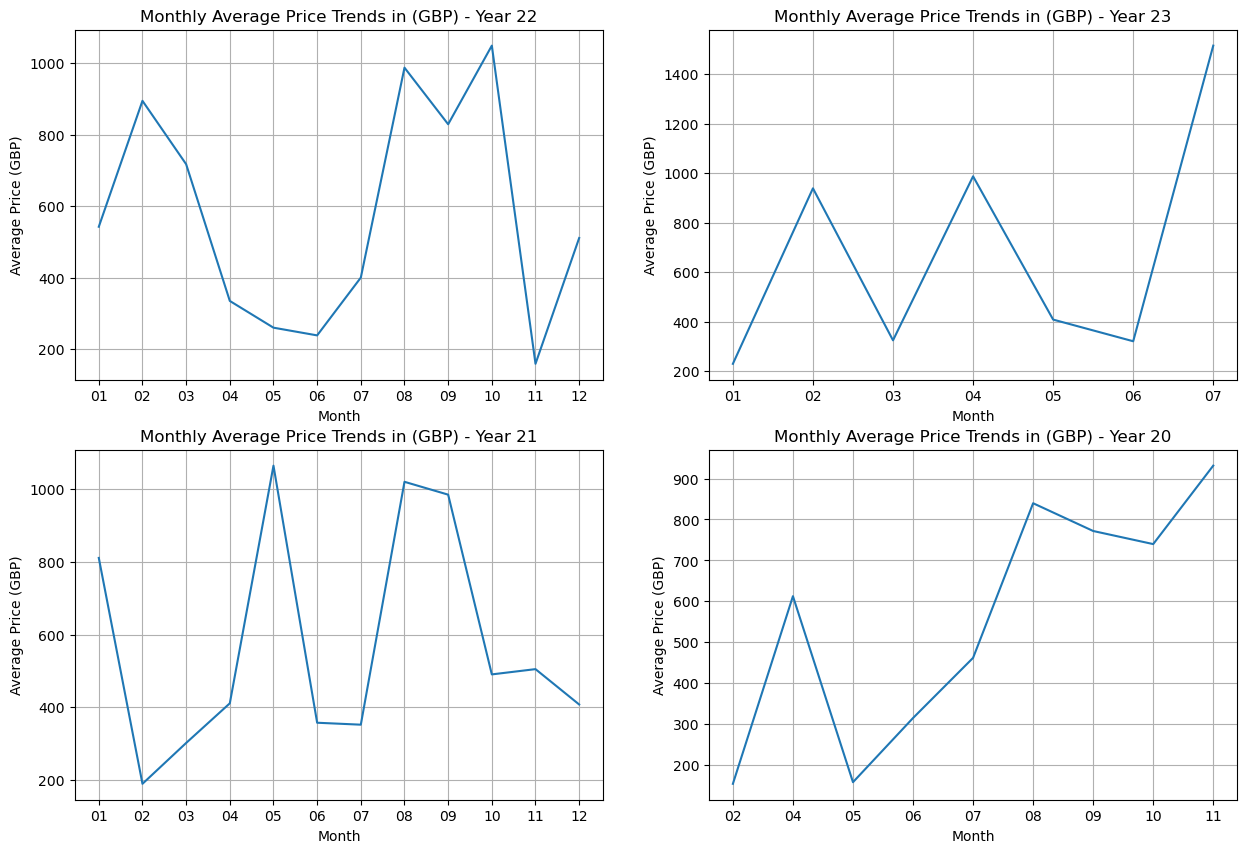

In [17]:
import matplotlib.pyplot as plt
i=0
plt.figure(figsize=(15, 10))
for year in years:
    plt.subplot(2, 2,i+1)
    plt.plot(monthly_avg_gbp[year])
    plt.title(f"Monthly Average Price Trends in (GBP) - Year {year}")
    plt.xlabel('Month')
    plt.ylabel('Average Price (GBP)')
    plt.grid(True)
    i += 1

plt.show()

#plotting seperate graph for each year